In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os, sys
sys.path.append("../src")
from isingFunctions import *
import time
from PIL import Image


(122, 122)


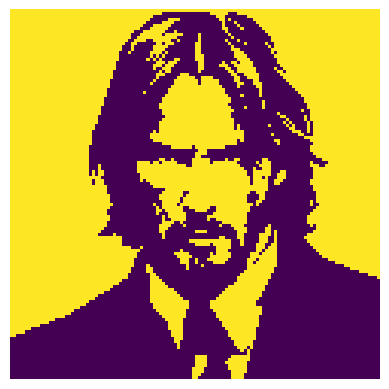

In [2]:
# WICK
path = "/home/nick/IsingHNN/images/wick.png"
wick =  np.array(np.asarray(Image.open(path)))

for i in range(wick.shape[0]):
    for j in range(wick.shape[1]):
        if wick[i, j]>0:
            wick[i, j] = 255
        #if wick[i, j]==6:
        #    wick[i, j] = 255
sub = 7
wick = wick[0:850:sub, 0:920-35:sub]
wick = wick[0:np.min(wick.shape), 0:np.min(wick.shape)]
plt.axis('off')
plt.imshow(wick)
print(wick.shape)

SIZE : (892, 889, 3)


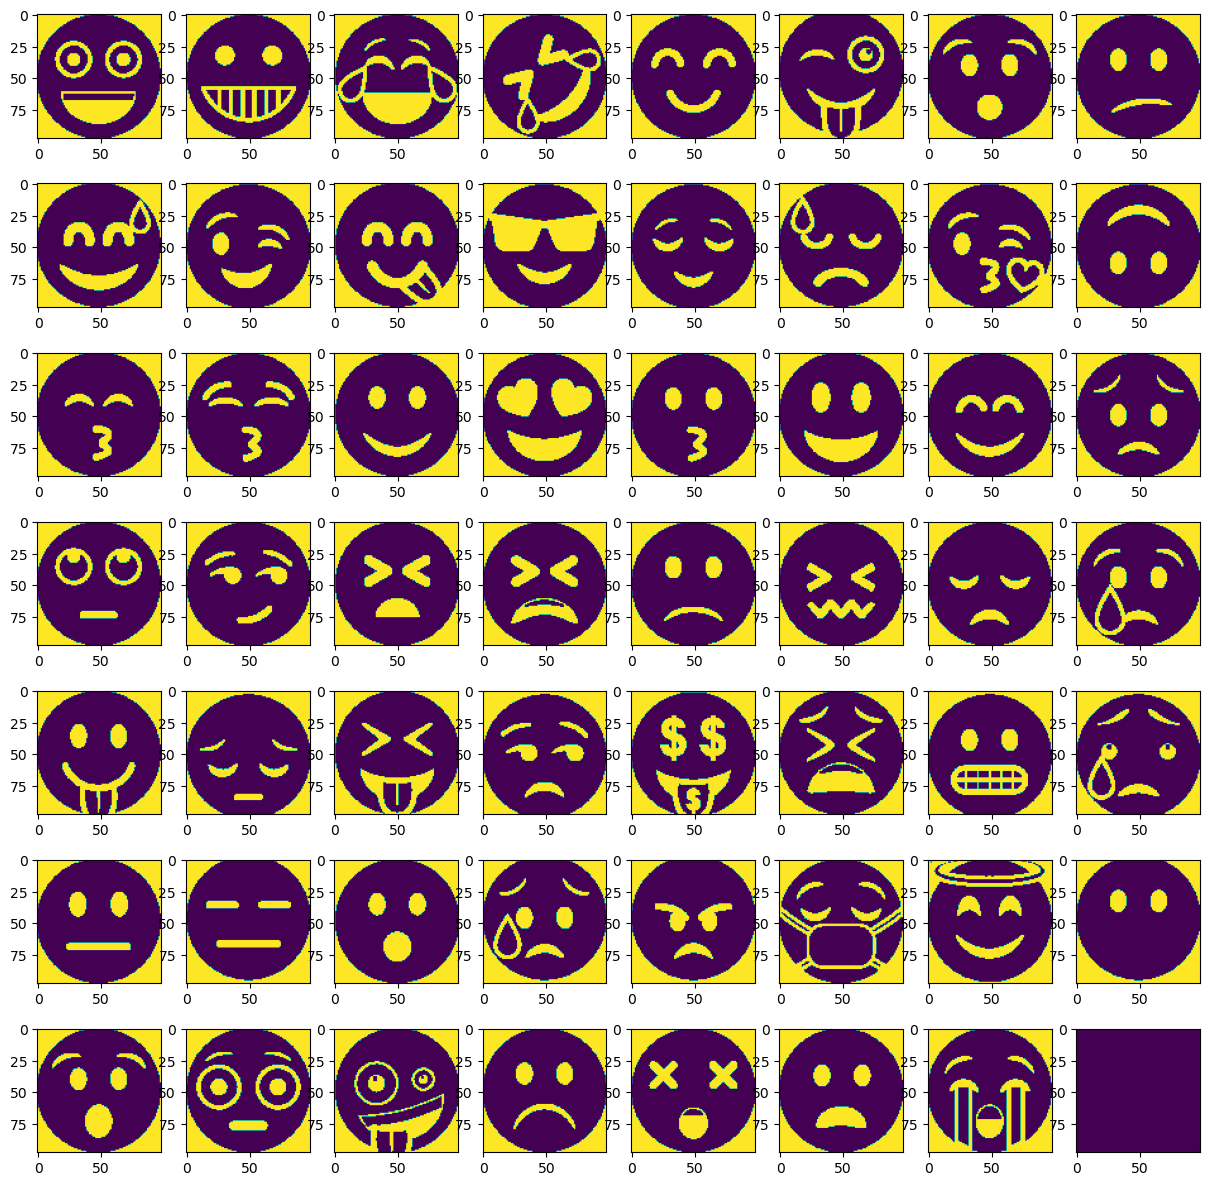

In [3]:
path = "/home/nick/IsingHNN/images/123fv-vector-33954/emoji.eps"
pic = Image.open(path)
# plt.imshow(pic)

data = np.asarray(pic)
print(f"SIZE : {data.shape}")


dr = 113 + 0
dc = 112
wr = 98
wc = 98

cols = [0, 111, 222, 335, 446, 558, 670, 781]
rows = [4, 113, 223, 333, 440, 556, 663]
nrows = len(rows)
ncols = len(cols)
coords = []
fig, ax = plt.subplots(nrows, ncols, figsize=[15, 15])
for i in range(len(rows)):        # range(nrows):
    for j in range(len(cols)):    #  range(ncols):
        ax[i, j].imshow(data[rows[i]:rows[i]+wr, cols[j]:cols[j]+wc, 0])
        coords.append([rows[i], cols[j]])

In [4]:
def makeBWMask(data):
    data = np.round(data/np.max(data))
    return -1 + 2*(data - np.min(data))/(np.max(data)-np.min(data))

(98, 98)


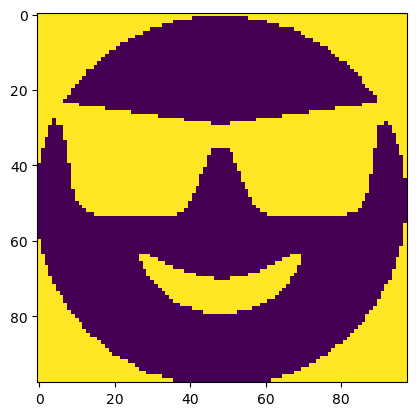

In [5]:
c = 11
rs = coords[c][0]
cs = coords[c][1]
emoji = makeBWMask(data[rs:rs+wr, cs:cs+wc, 0])
fig2, ax2 = plt.subplots()
ax2.imshow(emoji)
print(emoji.shape)

SHAPE =  (122, 122)


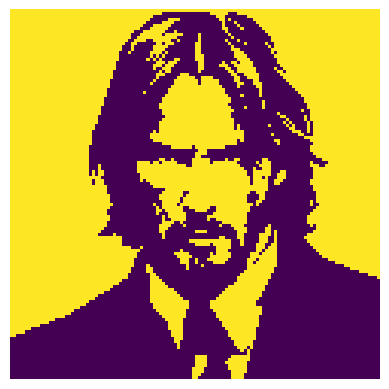

In [6]:
# number of lines
 
mask =  makeBWMask(wick) # [0:-2:2, 0:-2:2])

#mask = emoji

#mask = makeBWMask(data[rs:rs+wr, cs:cs+wc, 0])

C = mask.shape[0]
L = mask.shape[1]

print("SHAPE = ", mask.shape)
plt.imshow(mask)
plt.axis('off')
plt.savefig("wick_clean.png")

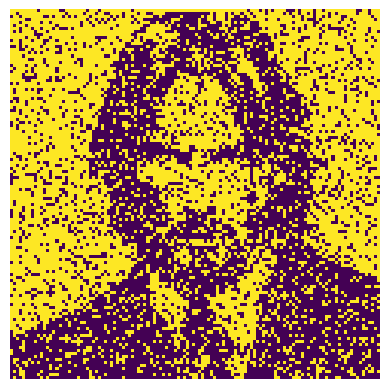

In [7]:
# probability of salt and pepper noise 
p = 0.2

# create observed image corresponding to the mask:
# change the sign with probability p
ima = np.multiply(np.sign(np.random.rand(mask.shape[0], mask.shape[1])-p), mask)
plt.axis('off')
plt.imshow(ima)

In [8]:
# set Markov Random Field (MRF) parameter
MRF_param = 1

# build coupling matrix J setting each non-zero edge to be ferromagnetic with periodic boundary conditions
J = build_J_MFR(L, C, MRF_param)


# build vector of constants
b = -0.5*np.log(p/(1-p))*ima.reshape([ima.size, 1])

In [9]:
# Ising machine parameters
# feedback parameter
alpha = 0.6495527055550837 # 0.25

# coupling parameter
beta = 0.16514527352598105 # 0.29

# zero-mean Gaussian noise std
std = 0.10285042290025447 # np.sqrt(0.01)

# Mach-Zehnder modulator bias
MZM_bias = np.pi/4

# DC bias
DC_bias = 1/2

# number of iterations
Nb_It = 100

In [10]:
# run Ising machine
t1 = time.time()
x, sigma ,HIsing = IsingMachine(J,b,alpha,beta,std,MZM_bias,DC_bias,Nb_It)
t2 = time.time()

print("Took : ", t2-t1)

Took :  53.32622504234314


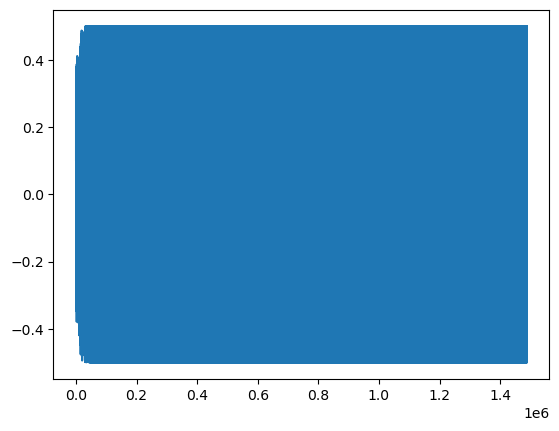

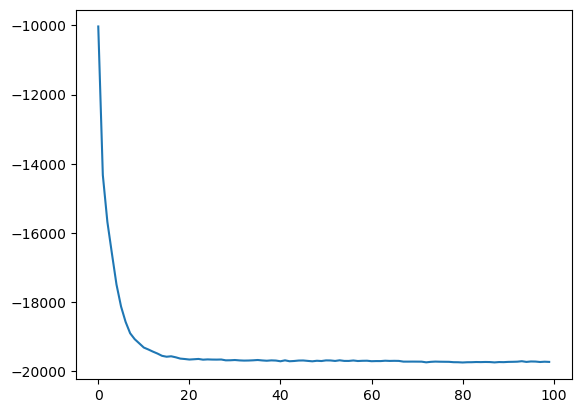

In [11]:
plt.close('all')
#plot sample and hold photodiodee output signal evolution with iteration index
plt.figure(1000)
plt.plot(np.arange(L*C*Nb_It), np.transpose(x).reshape([x.size]))
plt.figure(2000)
plt.plot(HIsing)

0


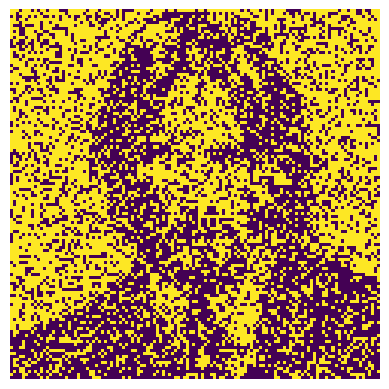

In [12]:
#convert spin vector to img
iteration = 0
plt.figure(iteration+10)
img = np.reshape(sigma[:, iteration], [L, C])
print(iteration)

plt.imshow(img)
plt.axis('off')
plt.savefig("wick_noisy.png")

-1


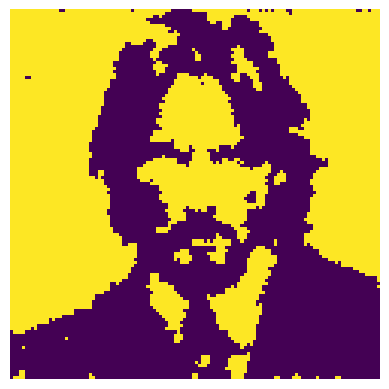

In [13]:
#convert spin vector to img
iteration = -1
plt.figure(iteration+10)
img = np.reshape(sigma[:, iteration], [L, C])
print(iteration)

plt.imshow(img)
plt.axis('off')
plt.savefig("wick_cleaned.png")

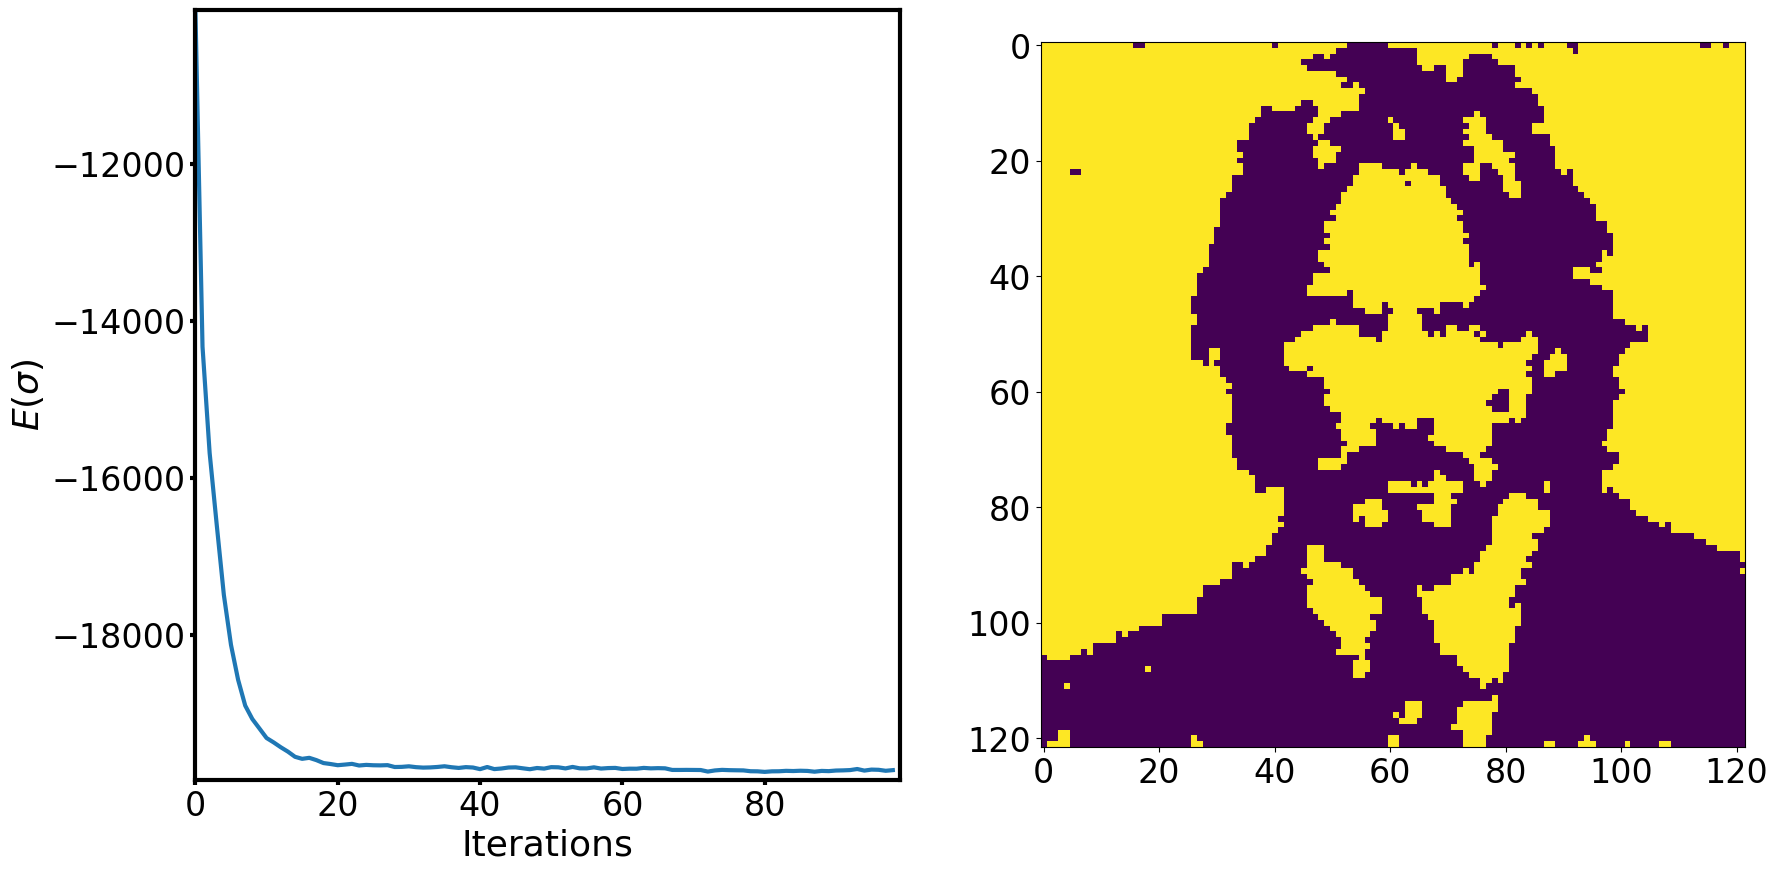

In [14]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

plt.close('all')
fig_ani, ax_ani = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))


t = np.arange(HIsing.size)
z = HIsing 

#scat = ax.scatter(t[0], z2[0], c="b", s=5) # , label=f'v0 = {v0} m/s')
line  = ax_ani[0].plot(t[0], z[0], lw=3) # , label=f'v0 = {v02} m/s')[0]
ax_ani[0].set(xlim=[0, np.max(t)], ylim=[np.min(z)-100, np.max(z)])
img = np.reshape(sigma[:, 0], [L, C])
line1 = ax_ani[1].imshow(img) 

#ax_ani.legend()

def update(frame):
    line[0].set_xdata(t[:frame])
    line[0].set_ydata(z[:frame])
    line1.set_array(np.reshape(sigma[:, frame], [L, C]))
    return (line)

# change all spines
for axis in ['top','bottom','left','right']:
    ax_ani[0].spines[axis].set_linewidth(3)

ax_ani[0].tick_params(width=3)
ax_ani[0].tick_params(axis='both', which='major', labelsize=24)
ax_ani[1].tick_params(axis='both', which='major', labelsize=24)
ax_ani[0].set_xlabel('Iterations', fontsize=26)
ax_ani[0].set_ylabel('$E(\\sigma)$', fontsize=26)


ax_ani[0].set_aspect('equal')
ax_ani[1].set_aspect('equal')
ax_ani[0].set_aspect('auto') 

animation_instance = animation.FuncAnimation(fig=fig_ani, func=update, frames=Nb_It, interval=30*6)
animation_instance.save('animation.gif', writer='pillow', dpi=100) # , bbox_inches='tight')
plt.show()